In [ ]:
# !pip install category_encoders

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_columns', None)

In [2]:
# Loading the data
df = pd.read_csv('Fortune 500 2017 - Fortune 500.csv')
df.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,Ceo,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,C. Douglas McMillon,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,Warren E. Buffett,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,Timothy D. Cook,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,Darren W. Woods,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,John H. Hammergren,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [3]:
# Checking the shape of data
df.shape

(500, 23)

## Data Preprocessing
We will start by doing these steps:
- Checking the datatype of each column
- Check if any column contains punctuations or other characters
- Checking the null values
- Checking the duplicate values

In [4]:
# Checking datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         500 non-null    int64  
 1   Title        500 non-null    object 
 2   Website      500 non-null    object 
 3   Employees    500 non-null    int64  
 4   Sector       500 non-null    object 
 5   Industry     500 non-null    object 
 6   Hqlocation   500 non-null    object 
 7   Hqaddr       500 non-null    object 
 8   Hqcity       500 non-null    object 
 9   Hqstate      500 non-null    object 
 10  Hqzip        500 non-null    int64  
 11  Hqtel        500 non-null    object 
 12  Ceo          500 non-null    object 
 13  Ceo-title    500 non-null    object 
 14  Address      500 non-null    object 
 15  Ticker       500 non-null    object 
 16  Fullname     500 non-null    object 
 17  Revenues     500 non-null    int64  
 18  Revchange    500 non-null    float64
 19  Profits 

'Prftchange' column has wrong datatype, so we will fix it by changing it to float64. But before we type cast it, there are also some other characters like ',' in few values, so, we will first remove all the punctuations and then change its datatype.

In [5]:
# Removing ',' from values
df['Prftchange'] = df['Prftchange'].str.replace(',', '')

In [6]:
# Changing the datatype
df['Prftchange'] = df['Prftchange'].astype(float)

In [7]:
# Checking the datatype again to see if its fixed
df['Prftchange'].dtype

dtype('float64')

In [8]:
# Checking for null values
df.isnull().sum()

Rank           0
Title          0
Website        0
Employees      0
Sector         0
Industry       0
Hqlocation     0
Hqaddr         0
Hqcity         0
Hqstate        0
Hqzip          0
Hqtel          0
Ceo            0
Ceo-title      0
Address        0
Ticker         0
Fullname       0
Revenues       0
Revchange      0
Profits        0
Prftchange     0
Assets         0
Totshequity    0
dtype: int64

In [9]:
# Checking for duplicate values
df.duplicated().sum()

0

## Exploratory Data Analysis

In [10]:
# Statistical summary of data
df.describe()

,Rank,Employees,Hqzip,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
count,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02,500.0000
mean,250.492000,5.635013e+04,46791.714000,24111.748000,3.75800,1779.479800,26.579200,8.038934e+04,13640.1470
std,144.477366,1.234520e+05,30160.384765,38337.353337,19.96748,3937.558721,649.036355,2.704257e+05,30523.1538
min,1.000000,8.300000e+01,1104.000000,5145.000000,-57.50000,-6177.000000,-1499.600000,4.370000e+02,-12688.0000
25%,125.750000,1.190000e+04,19099.000000,7245.000000,-3.82500,235.725000,-20.300000,8.436500e+03,1997.5000
50%,250.500000,2.500000e+04,46244.500000,11384.000000,1.90000,683.600000,2.250000,1.932450e+04,4981.0000
75%,375.250000,5.682525e+04,75045.000000,22605.250000,7.32500,1770.775000,20.450000,4.812600e+04,12467.7500
max,500.000000,2.300000e+06,98188.000000,485873.000000,197.30000,45687.000000,12450.000000,3.287968e+06,283001.0000


In [21]:
df.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,Ceo,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,C. Douglas McMillon,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,Warren E. Buffett,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0.0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,Timothy D. Cook,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,972-444-1000,Darren W. Woods,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,415-983-8300,John H. Hammergren,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53.0,56563,8924.0


In [19]:
# Top 5 companies by highest revenue

top_5_companies_by_revenue = df.sort_values(by='Revenues', ascending=False).head()

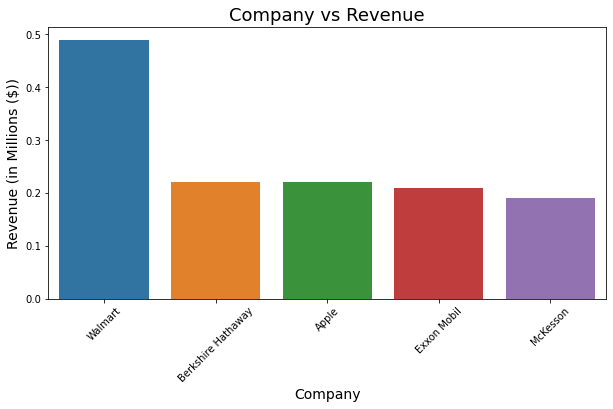

In [248]:
fig, ax = plt.subplots(figsize=(10,5))

top_5_companies_by_revenue['Revenue_in_Millions'] = (top_5_companies_by_revenue['Revenues'] / 1000000).astype(float).round(2)
sns.barplot(x='Title', y='Revenue_in_Millions', data=top_5_companies_by_revenue)
plt.xlabel("Company", fontsize=14)
plt.ylabel("Revenue (in Millions ($))", fontsize=14)
plt.title("Company vs Revenue", fontsize=18)
plt.xticks(rotation = 45);

In [31]:
# Top 5 companies by highest number of employees

top_5_companies_by_employees = df.sort_values(by='Employees', ascending=False).head()

Text(0.5, 1.0, 'Company vs Employees')

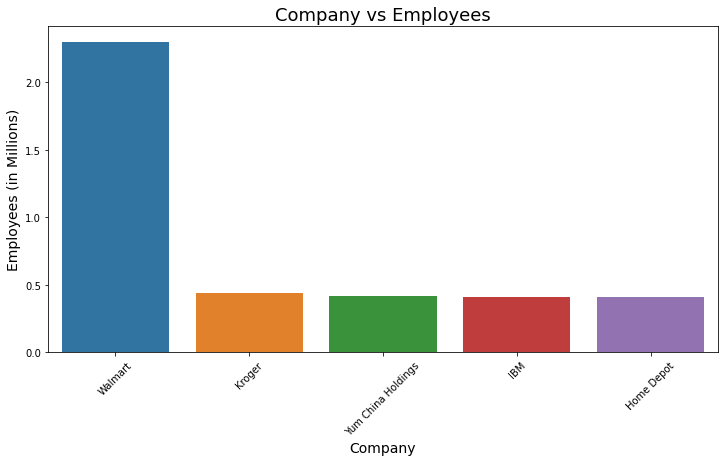

In [32]:
fig, ax = plt.subplots(figsize=(12,6))

top_5_companies_by_employees['Employees_in_Millions'] = (top_5_companies_by_employees['Employees'] / 1000000).astype(float).round(2)
sns.barplot(x='Title', y='Employees_in_Millions', data=top_5_companies_by_employees)
plt.xticks(rotation = 45);
plt.xlabel("Company", fontsize=14)
plt.ylabel("Employees (in Millions)", fontsize=14)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title("Company vs Employees", fontsize=18)

In [116]:
top_5_sectors = df['Sector'].value_counts().sort_values(ascending=False).reset_index()
top_5_sectors_df = pd.DataFrame(top_5_sectors)
top_5_sectors_df = top_5_sectors_df.rename({'index':'Sector', 'Sector':'Total'}, axis=1)

top_5 = list(top_5_sectors_df['Sector'].head())
others = top_5_sectors_df[~top_5_sectors_df['Sector'].isin(top_5_sectors_df['Sector'].head())]
others = list(others['Sector'])
top_5_sectors_df['Sector'] =  top_5_sectors_df['Sector'].replace(others, 'Others')

In [117]:
top_5_sectors_df

,Sector,Total
0,Financials,84
1,Energy,57
2,Retailing,47
3,Technology,43
4,Health Care,38
5,Others,29
6,Others,24
7,Others,20
8,Others,19
9,Others,19


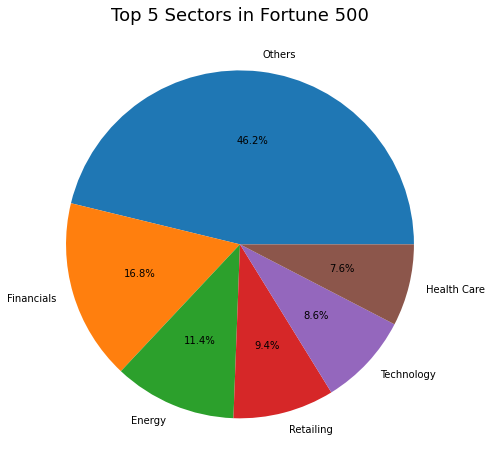

In [125]:
# Top 5 sectors in Fortune 500

top_5_sectors = top_5_sectors_df.groupby('Sector').sum().sort_values(by='Total', ascending=False)

sectors = top_5_sectors.index
plt.figure(figsize=(8,8))
plt.pie(top_5_sectors['Total'], labels=sectors, autopct='%1.1f%%');
plt.title("Top 5 Sectors in Fortune 500", fontsize=18);

In [133]:
# Top 5 industries in Fortune 500

top_5_industries = df['Industry'].value_counts().sort_values(ascending=False).reset_index()
top_5_industries_df = pd.DataFrame(top_5_industries)
top_5_industries_df = top_5_industries_df.rename({'index':'Industry', 'Industry':'Total'}, axis=1)

top_5 = list(top_5_industries_df['Industry'].head())
others = top_5_industries_df[~top_5_industries_df['Industry'].isin(top_5_industries_df['Industry'].head())]
others = list(others['Industry'])
top_5_industries_df['Industry'] =  top_5_industries_df['Industry'].replace(others, 'Others')

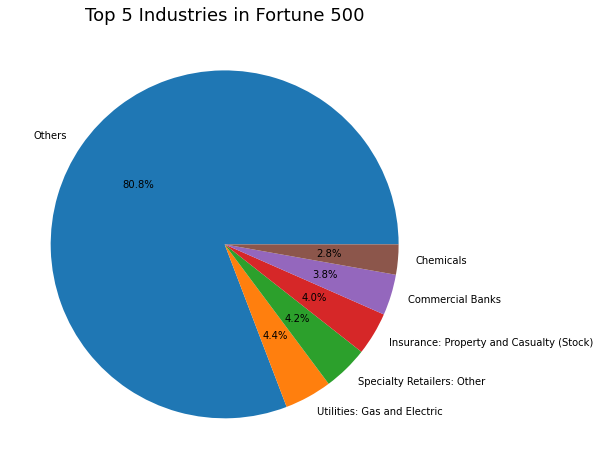

In [135]:
# Top 5 sectors in Fortune 500

top_5_industries = top_5_industries_df.groupby('Industry').sum().sort_values(by='Total', ascending=False)

industries = top_5_industries.index
plt.figure(figsize=(8,8))
plt.pie(top_5_industries['Total'], labels=industries, autopct='%1.1f%%');
plt.title("Top 5 Industries in Fortune 500", fontsize=18);

Text(0.5, 1.0, 'Sectors vs Revenues')

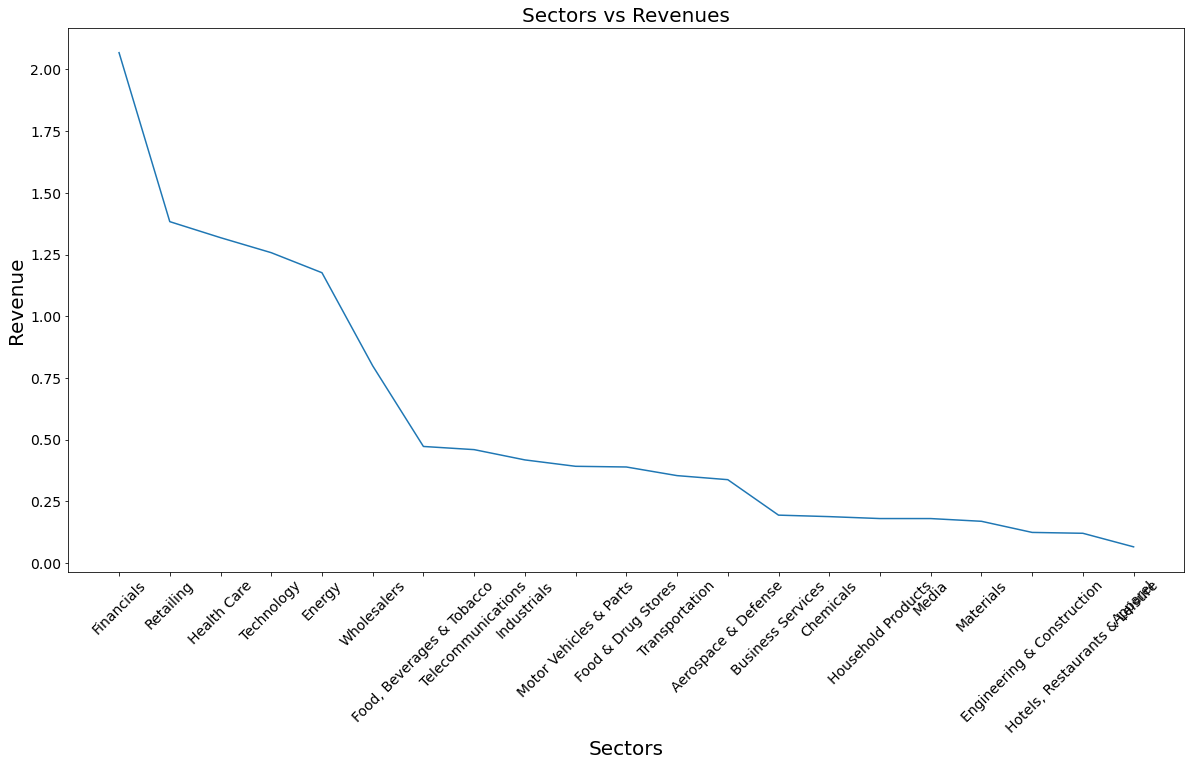

In [139]:
# Visualizing revenues of each sector
sectors_vs_revenue = df.groupby('Sector')['Revenues'].sum().sort_values(ascending=False)
revenue_in_millions = sectors_vs_revenue.values / 1000000
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=sectors_vs_revenue.index, y=revenue_in_millions, data=sectors_vs_revenue)
plt.xlabel("Sectors", fontsize=20)
plt.ylabel("Revenue", fontsize=20)
plt.xticks(fontsize=14, rotation = 45);
plt.yticks(fontsize=14);
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title("Sectors vs Revenues", fontsize=20)

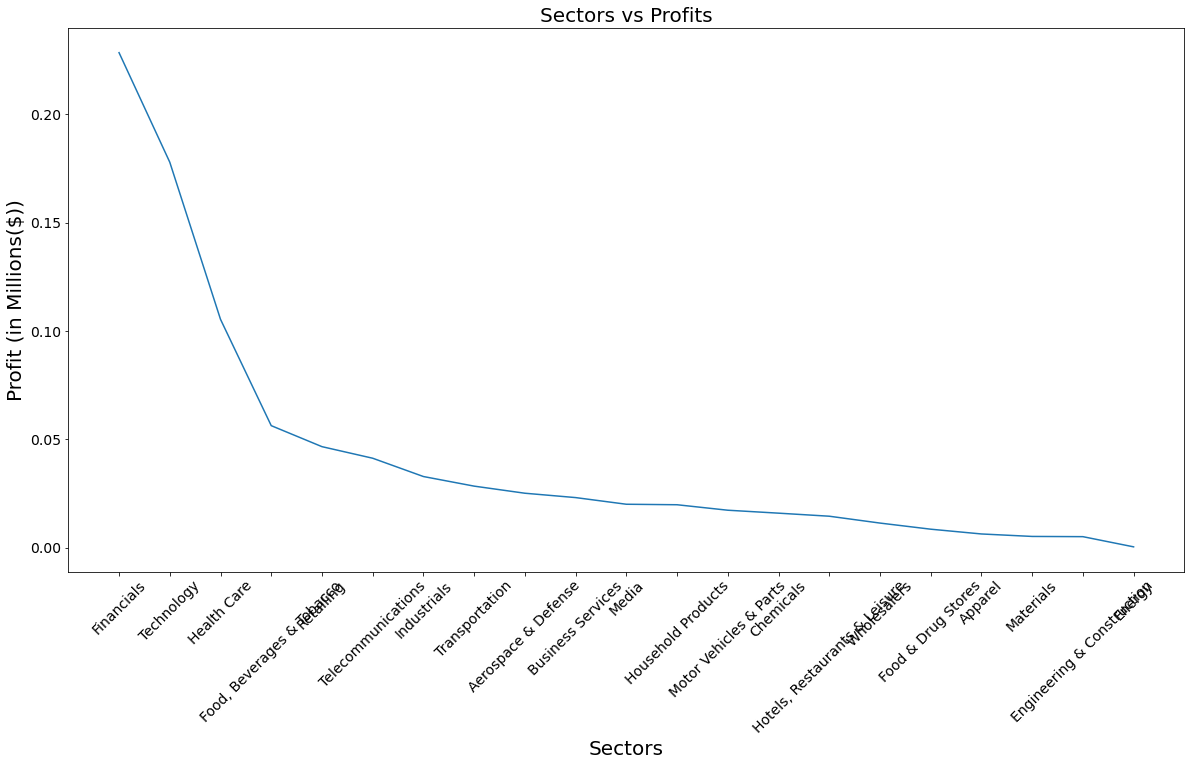

In [255]:
# Visualizing profits of each sector
sectors_vs_profits = df.groupby('Sector')['Profits'].sum().sort_values(ascending=False)
profit_in_millions = sectors_vs_profits.values / 1000000

fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=sectors_vs_profits.index, y=profit_in_millions, data=sectors_vs_profits)
plt.xlabel("Sectors", fontsize=20)
plt.ylabel("Profit (in Millions($))", fontsize=20)
plt.xticks(fontsize=14, rotation = 45);
plt.yticks(fontsize=14);
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title("Sectors vs Profits", fontsize=20);

In [148]:
df.groupby('Title')['Assets'].sum().sort_values(ascending=False).head()

Title
Fannie Mae               3287968
J.P. Morgan Chase        2490972
Bank of America Corp.    2187702
Freddie Mac              2023376
Wells Fargo              1930115
Name: Assets, dtype: int64

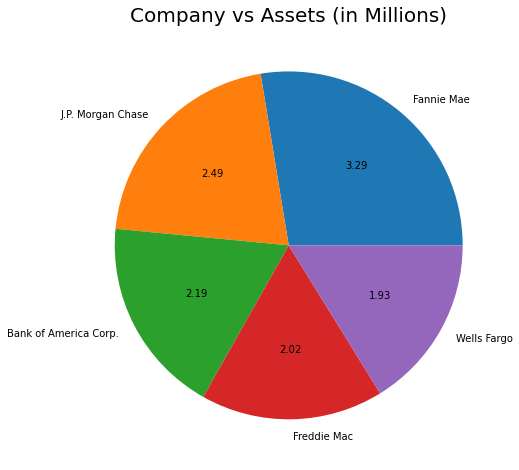

In [156]:
# Which top 5 companies have the highest assets?

top_5_company_assets = df.groupby('Title')['Assets'].sum().sort_values(ascending=False).head()
assets_in_millions = top_5_company_assets.values/1000000
plt.figure(figsize=(8,8))

def absolute_value(val):
    a  = np.round(val/100.*assets_in_millions.sum(), 2)
    return a

plt.pie(assets_in_millions, labels=top_5_company_assets.index, autopct = absolute_value);
plt.title("Company vs Assets (in Millions)", fontsize=20);

<AxesSubplot:>

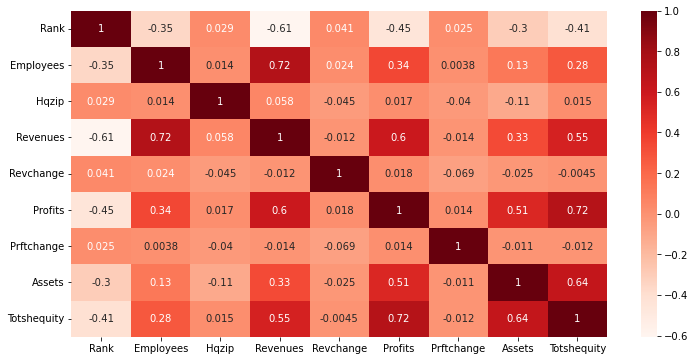

In [20]:
# Checking correlation

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="Reds" )

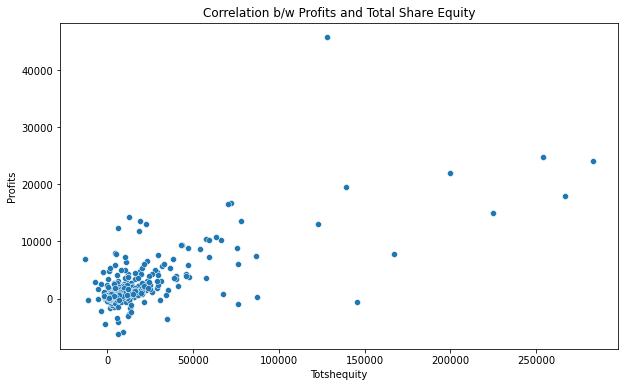

In [125]:
# Checking correlation between Profits and Total Share Equity
plt.figure(figsize=(10,6))
sns.scatterplot(x='Totshequity', y='Profits', data=df)
plt.title("Correlation b/w Profits and Total Share Equity");

# Feature Engineering

In [158]:
# Selecting only the relevant columns

cols_to_use = ['Employees', 'Revenues', 'Revchange', 'Sector', 'Profits', 'Prftchange', 'Assets', 'Totshequity']

df = df[cols_to_use]

In [159]:
df.shape

(500, 8)

In [171]:
# Encoding "Sector" column
encoder = ce.OneHotEncoder(cols='Sector', handle_unknown='return_nan', return_df=True, use_cat_names=True)

df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Employees,Revenues,Revchange,Sector_Retailing,Sector_Financials,Sector_Technology,Sector_Energy,Sector_Wholesalers,Sector_Health Care,Sector_Motor Vehicles & Parts,Sector_Telecommunications,Sector_Industrials,Sector_Food & Drug Stores,Sector_Aerospace & Defense,Sector_Household Products,"Sector_Food, Beverages & Tobacco",Sector_Transportation,Sector_Media,Sector_Chemicals,Sector_Apparel,"Sector_Hotels, Restaurants & Leisure",Sector_Materials,Sector_Business Services,Sector_Engineering & Construction,Profits,Prftchange,Assets,Totshequity
0,2300000,485873,0.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13643.0,-7.2,198825,77798.0
1,367700,223604,6.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24074.0,0.0,620854,283001.0
2,116000,215639,-7.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45687.0,-14.4,321686,128249.0
3,72700,205004,-16.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7840.0,-51.5,330314,167325.0
4,68000,192487,6.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2258.0,53.0,56563,8924.0


In [209]:
# Separating depending and independent features

X = df_encoded.drop('Profits', axis=1)
y = df_encoded['Profits'].values

In [216]:
# Scaling the data for cross validation

sc = StandardScaler()

df_scaled = sc.fit_transform(df_encoded)

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_encoded.columns
df_scaled = df_scaled.sample(frac=1)

X_scaled = df_scaled.drop('Profits', axis=1)
y_scaled = df_scaled['Profits'].values

In [162]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [163]:
# Scaling the data
# Scaled data has a mean of 0 or almost equal to 0 and a standard deviation of 1
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
X_train

array([[-0.01016672, -0.32081542, -0.15004793, ..., -0.06174108,
        -0.14803286, -0.31745119],
       [ 0.11221597,  0.65109259, -0.22295909, ..., -0.03900793,
         0.10871277,  1.61690305],
       [-0.26526503, -0.4530274 ,  0.05410332, ..., -0.06404146,
        -0.27920419, -0.41786062],
       ...,
       [-0.29084081, -0.00639818, -0.12088346, ..., -0.05876412,
        -0.24503926, -0.31970942],
       [-0.06337755,  0.8976193 , -0.091719  , ..., -0.09611144,
         2.28928262,  1.03686515],
       [-0.06146486, -0.21169916, -1.82700463, ..., -0.0429321 ,
        -0.20291667, -0.15620046]])

# Modelling

We will be implementing:
- Multiple Linear Regression
- Polynomial Regression
- Lasso Regression
- Ridge Regression

### 1) Multiple Linear Regression

In [165]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [166]:
# Predicting on test set
lr_pred = lr.predict(X_test)

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2 Score:", r2_score(y_test, lr_pred))

Root Mean Squared Error: 1635.1952125216146
R2 Score: 0.7147389070862931


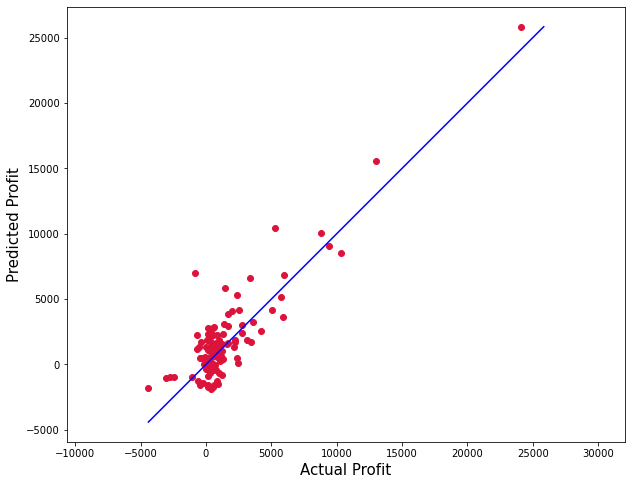

In [243]:
# Prediction Plot of Linear Regression

plt.figure(figsize=(10,8))
plt.scatter(y_test, lr_pred, c='crimson')

p1 = max(max(lr_pred), max(y_test))
p2 = min(min(lr_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Profit', fontsize=15)
plt.ylabel('Predicted Profit', fontsize=15)
plt.axis('equal')
plt.show()

#### Cross Validation

In [217]:
# Cross validation of Lienar Regression
lr = LinearRegression()

cv_lr = cross_val_score(lr, X_scaled, y_scaled, scoring='r2', cv=3)

In [218]:
cv_lr

array([0.34987694, 0.49594004, 0.73685673])

In [225]:
# Mean R2 Score
lr_cv = cv_lr.mean()
lr_cv

0.5275579038424608

### 2) Polynomial Regression

In [232]:
poly_features = PolynomialFeatures(degree=4)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

In [233]:
poly = LinearRegression()
poly.fit(X_poly_train, y_train)

LinearRegression()

In [234]:
poly_pred = poly.predict(X_poly_test)

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, poly_pred)))
print("Score:", r2_score(y_test, poly_pred))

Root Mean Squared Error: 4154541.767094502
Score: -1841405.1393606178


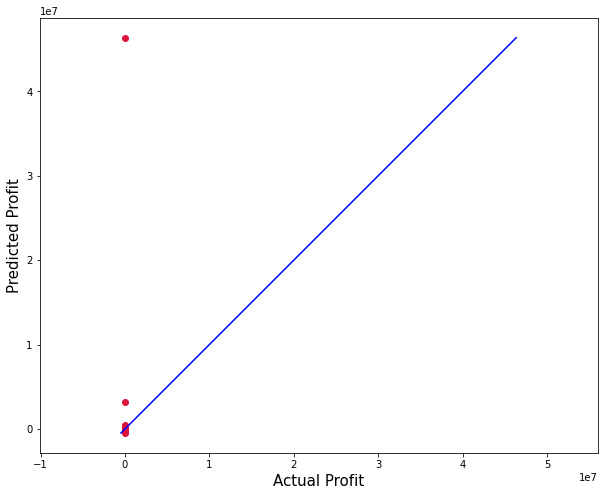

In [245]:
# Prediction Plot of Polynomial Regression

plt.figure(figsize=(10,8))
plt.scatter(y_test, poly_pred, c='crimson')

p1 = max(max(poly_pred), max(y_test))
p2 = min(min(poly_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Profit', fontsize=15)
plt.ylabel('Predicted Profit', fontsize=15)
plt.axis('equal')
plt.show()

#### Cross Validation

In [221]:
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_scaled)
    poly = LinearRegression()
    return np.mean(cross_val_score(poly, X_poly, y_scaled, scoring='r2', cv=3))

poly_cv = []
for i in range(2,5):
    poly_cv.append(create_polynomial_regression_model(i))

poly_cv

[-2.8285455024861344e+19, -22122981.530381065, -1638205251.5496771]

In [238]:
poly_cv = np.mean(poly_cv)
poly_cv

-9.428485008840557e+18

### 3) Ridge Regression

In [191]:
# Ridge Regression

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [192]:
ridge_pred = ridge.predict(X_test)

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("R2 Score:", r2_score(y_test, ridge_pred))

Root Mean Squared Error: 1629.2505060545182
R2 Score: 0.7168092543402913


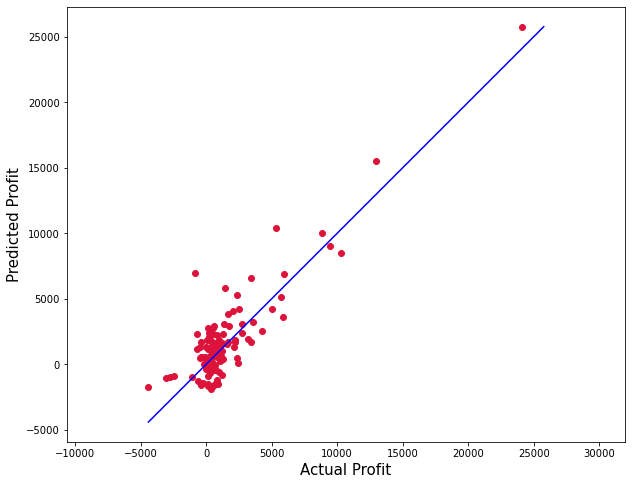

In [246]:
# Prediction Plot of Ridge Regression

plt.figure(figsize=(10,8))
plt.scatter(y_test, ridge_pred, c='crimson')

p1 = max(max(ridge_pred), max(y_test))
p2 = min(min(ridge_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Profit', fontsize=15)
plt.ylabel('Predicted Profit', fontsize=15)
plt.axis('equal')
plt.show()

#### Cross Validation

In [226]:
ridge = Ridge()

cv_ridge = cross_val_score(ridge, X_scaled, y_scaled, scoring='r2', cv=3)

ridge_cv = cv_ridge.mean()
ridge_cv

0.5296027354026148

### Lasso Regression

In [194]:
# Lasso Regression

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [195]:
lasso_pred = lasso.predict(X_test)

print("Mean Squared Error:", np.sqrt(mean_squared_error(y_test, lasso_pred)))
print("R2 Score:", r2_score(y_test, lasso_pred))

Mean Squared Error: 1632.1249081278177
R2 Score: 0.7158091354316389


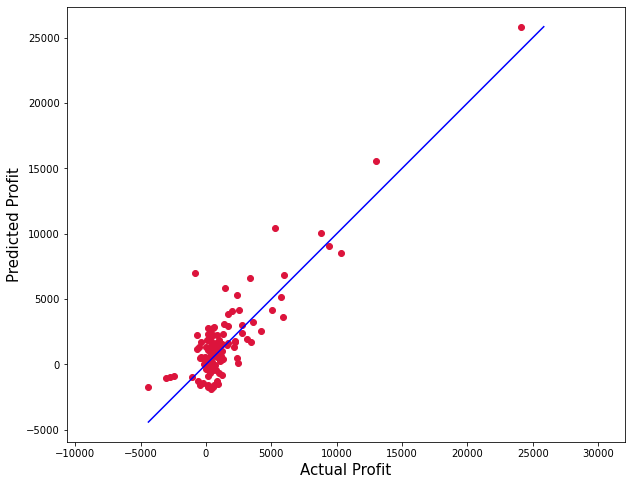

In [247]:
# Prediction Plot of Lasso Regression

plt.figure(figsize=(10,8))
plt.scatter(y_test, lasso_pred, c='crimson')

p1 = max(max(lasso_pred), max(y_test))
p2 = min(min(lasso_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Profit', fontsize=15)
plt.ylabel('Predicted Profit', fontsize=15)
plt.axis('equal')
plt.show()

#### Cross Validation

In [227]:
# Lasso Regression

lasso = Lasso()

cv_lasso = cross_val_score(lasso, X_scaled, y_scaled, scoring='r2', cv=3)

lasso_cv = cv_lasso.mean()
lasso_cv

-0.0005131380655116017

### Models Result Summary

In [235]:
lr_r2 = r2_score(y_test, lr_pred)
poly_r2 = r2_score(y_test, poly_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [236]:
# Results obtained on test data
pd.options.display.float_format = '{:.3f}'.format
Results = pd.DataFrame({
    'Regression Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', \
                         'Lasso Regression'],
    'R2-Score':   [lr_r2,
                        poly_r2,
                        ridge_r2,
                        lasso_r2,
                        ]
                        })
outcome = Results.sort_values(by='R2-Score', ascending=False).set_index('Regression Model')
outcome

,R2-Score
Regression Model,
Ridge Regression,0.717
Lasso Regression,0.716
Linear Regression,0.715
Polynomial Regression,-1841405.139


In [240]:
# Results obtained from cross validation
pd.options.display.float_format = '{:.3f}'.format
Results = pd.DataFrame({
    'Regression Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', \
                         'Lasso Regression'],
    'R2-Score':   [lr_cv,
                        poly_cv,
                        ridge_cv,
                        lasso_cv,
                        ]
                        })
outcome = Results.sort_values(by='R2-Score', ascending=False).set_index('Regression Model')
outcome

,R2-Score
Regression Model,
Ridge Regression,0.530
Linear Regression,0.528
Lasso Regression,-0.001
Polynomial Regression,-9428485008840556544.000
